# Desafío - Dimensionalidad y agrupación (II)

# Desafío 1: Preparación del ambiente de trabajo

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:

- Comencemos por incluír las librerías clásicas: ​<code>pandas</code>​, ​<code>numpy</code>​ y ​<code>matplotlib.pyplot</code>​.
- <code>sklearn.cluster.KMeans</code>​:para extraer los principales componentes de una matriz numérica.
- <code>skimage.io​</code>: Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
import skimage.io as io

# Desafío 2: Importación de imágenes

- Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello ocuparemos ​<code>io.imread</code>​. ¿Qué devuelve?
- Para visualizar la imágen en el notebook, ocupe <code>​io.imshow​</code>.

In [2]:
imagen_random = "jamie-xx-in-colour.jpeg"
io.imread(imagen_random)

array([[[250, 168,  69],
        [238, 144,  44],
        [240, 133,  39],
        ...,
        [221,  53, 128],
        [225,  42, 122],
        [240, 112, 173]],

       [[252, 170,  58],
        [232, 141,  24],
        [231, 124,  18],
        ...,
        [222,  24, 111],
        [226,  13, 105],
        [238,  80, 154]],

       [[255, 176,  47],
        [248, 160,  24],
        [248, 146,  20],
        ...,
        [228,  30, 118],
        [231,  17, 113],
        [242,  84, 161]],

       ...,

       [[ 49, 169,  79],
        [ 30, 155,  64],
        [ 33, 160,  89],
        ...,
        [ 49,  58, 149],
        [ 62,  34, 134],
        [116, 100, 162]],

       [[ 38, 167,  84],
        [ 18, 149,  81],
        [ 21, 153, 104],
        ...,
        [ 19,  57, 142],
        [ 30,  33, 126],
        [107,  87, 156]],

       [[115, 197, 151],
        [ 93, 176, 146],
        [ 95, 181, 154],
        ...,
        [ 87, 117, 179],
        [ 78, 104, 163],
        [154, 160, 194]]

In [3]:
io.imread(imagen_random).shape

(640, 640, 3)

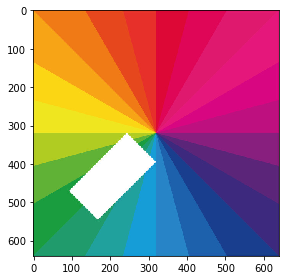

In [4]:
io.imshow(imagen_random)

io.imread devuelve un array donde las primeras dos dimensiones son las dimensiones de la imagen (en este caso la imagen de es de 1.500 x 1.500), por tanto io.imread devuelve un array de 1.500 x 1.500 x 3 (donde el 3 indica que cada pixel es en realidad una matriz de 3x3)

# Desafío 3: Preprocesamiento de imágenes y KMeans

## i) Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales mediante ​shape​.

In [5]:
io.imread(imagen_random).shape

(640, 640, 3)

## ii) Posteriormente redimensionaremos la imágen con reshape.

In [6]:
img = io.imread(imagen_random).reshape(-3,3)
img

array([[250, 168,  69],
       [238, 144,  44],
       [240, 133,  39],
       ...,
       [ 87, 117, 179],
       [ 78, 104, 163],
       [154, 160, 194]], dtype=uint8)

## iii) Partamos por inicializar nuestro algoritmo ​KMeans​ con un ​k=​8​, ¿Qué significa esto?

In [7]:
modelo = KMeans(n_clusters=8).fit(img)

## iv) Vuelva a implementar el mismo algoritmo con ​MiniBatchKMeans​.¿Qué diferencia existe con ​KMeans​?

In [8]:
modelo_minibatch = MiniBatchKMeans(8).fit(img)

C:\Users\fsilva\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


**Comentario**

MiniBatchKMeans se demora aprox 1/3 del tiempo que KMeans

# Desafío 4: Extracción de valores

## i) Ahora extraemos las etiquetas predichas con ​<code>labels_</code>​. Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en estos, debemos extraer los valores de los centroides.

In [9]:
modelo_minibatch.labels_

array([0, 0, 0, ..., 5, 5, 5])

## ii) Para extraer los centroides (valores característicos),utilizamos el atributo <code>cluster_centers_</code>​.

In [10]:
modelo_minibatch.cluster_centers_

array([[243.66233766, 142.75324675,  22.53246753],
       [ 68.3974359 ,  45.32051282, 129.99145299],
       [218.6722408 ,  16.28428094, 116.30769231],
       [254.42857143, 254.73469388, 254.33673469],
       [ 51.56428571, 163.27857143,  76.27142857],
       [ 31.54444444, 138.15      , 187.70555556],
       [227.9483871 ,  46.7483871 ,  40.35483871],
       [218.87142857, 215.35714286,  29.42857143]])

## iii) Con las etiquetas, generamos un conteo de ocurrencia con <code>​np.unique</code>​.

Para extraer el conteo, debemos implementar la opción ​<code>return_counts=​True​</code>.

In [11]:
pd.DataFrame(np.unique(modelo_minibatch.labels_, return_counts=True)).T.rename(columns = {0:'Cluster',1:'Frecuencia'})

,Cluster,Frecuencia
0,0,43238
1,1,72636
2,2,88862
3,3,22800
4,4,39534
5,5,56393
6,6,43201
7,7,42936


# Desafío 5: Conversión rgb a hex

Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con ​<code>map​</code> por cada centroide.

In [12]:
from matplotlib.colors import rgb2hex

A = modelo_minibatch.cluster_centers_/255
B = [rgb2hex(A[i,:]) for i in range(A.shape[0]) ]
B

['#f48f17',
 '#442d82',
 '#db1074',
 '#fefffe',
 '#34a34c',
 '#208abc',
 '#e42f28',
 '#dbd71d']

# Desafío 6: Definición de base

Ahora generamos un DataFrame con las siguientes variables:
- El color ​hex​.
- La ocurrencia del color en cada pixel ​count​.
- El porcentaje de ocurrencia de cada color respecto a ​<code>cluster_centers_​</code>.

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [13]:
img_0_1 = img/255
df6 = pd.DataFrame(pd.DataFrame([rgb2hex(img_0_1[i,:]) for i in range(img_0_1.shape[0]) ]).value_counts()).rename(columns = {0:'Frecuencia(#)'}).reset_index().rename(columns = {0:'Color Hex'})
df6

,Color Hex,Frecuencia(#)
0,#ffffff,19657
1,#e5177b,18070
2,#3d297e,18029
3,#df196e,17965
4,#f07a16,17848
...,...,...
12100,#63ad3a,1
12101,#63ad32,1
12102,#63ad30,1
12103,#63ac36,1


In [14]:
df6['Ocurrencia en cluster_centers_'] = np.where(df6['Color Hex'].isin(B), 1/8,0)
df6['Porcentaje(%)'] = df6['Frecuencia(#)']/np.sum(df6['Frecuencia(#)'])
df6

,Color Hex,Frecuencia(#),Ocurrencia en cluster_centers_,Porcentaje(%)
0,#ffffff,19657,0.0,0.047991
1,#e5177b,18070,0.0,0.044116
2,#3d297e,18029,0.0,0.044016
3,#df196e,17965,0.0,0.043860
4,#f07a16,17848,0.0,0.043574
...,...,...,...,...
12100,#63ad3a,1,0.0,0.000002
12101,#63ad32,1,0.0,0.000002
12102,#63ad30,1,0.0,0.000002
12103,#63ac36,1,0.0,0.000002


# Desafío 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar coloreadas con el color inferido.

[Text(0, 0, '#ffffff'),
 Text(1, 0, '#e5177b'),
 Text(2, 0, '#3d297e'),
 Text(3, 0, '#df196e'),
 Text(4, 0, '#f07a16'),
 Text(5, 0, '#193e8e'),
 Text(6, 0, '#f7a416'),
 Text(7, 0, '#d80681'),
 Text(8, 0, '#df0657'),
 Text(9, 0, '#5b2579'),
 Text(10, 0, '#fbd614'),
 Text(11, 0, '#1d61ac'),
 Text(12, 0, '#e6471d'),
 Text(13, 0, '#e7302a'),
 Text(14, 0, '#2784c7')]

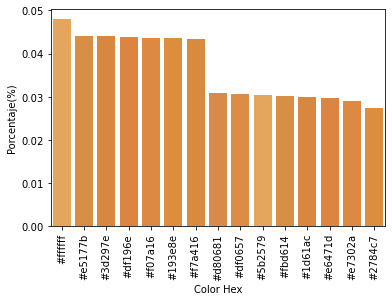

In [19]:
import seaborn as sns
n = 15 #cantidad de datos, seteo esto por que son demasiado colores para gráfico

sns.barplot(data=df6.head(n), x='Color Hex', y = 'Porcentaje(%)', palette=np.array(pd.DataFrame(img/255).head(n).drop_duplicates())
           ).set_xticklabels(rotation=90, labels = df6['Color Hex'].head(n))

# Bonus point: Envuelva todo en una función